### Following notebooks will not run as the datasets are not shareable from customer

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [3]:
import metric_learn


In [4]:
%pylab inline
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

Populating the interactive namespace from numpy and matplotlib


### Explore the shape and data included in the spectra files on an example

In [5]:
data = pd.read_csv('Critical_KMONs/2017-1-11-17-18-23_DET7AKMON_PodA_CHA_KMON_Step0_spectra_A.csv')
data.head()

,Name,Run Time,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
0,A,2.0,753,742,733,724,714,709,705,704,...,869,824,901,1280,1552,1414,952,872,1080,1081
1,A,4.0,957,926,898,870,846,829,816,806,...,1215,1110,1288,2261,2954,2596,1424,1228,1758,1747
2,A,6.0,1065,1024,985,945,912,887,872,858,...,1216,1110,1290,2223,2890,2548,1420,1227,1733,1718
3,A,8.0,1066,1022,984,947,914,886,873,861,...,1205,1103,1279,2175,2814,2485,1401,1212,1700,1693
4,A,10.0,1068,1025,985,947,913,889,868,857,...,1194,1094,1264,2140,2768,2449,1390,1203,1680,1671


In [6]:
data.shape

(362, 1203)

In [7]:
# here we adjust the df's row and column indexes 
data_df = data.rename(columns ={'Run Time':'Time'}, inplace = True)
data_df = data.drop('Name', 1)
data_df.set_index('Time', inplace = True)
data_df.columns.name = 'Wavelength'

data_df.head()

Wavelength,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,204.0,204.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
Time,,,,,,,,,,,,,,,,,,,,,
2.0,753,742,733,724,714,709,705,704,702,698,...,869,824,901,1280,1552,1414,952,872,1080,1081
4.0,957,926,898,870,846,829,816,806,801,794,...,1215,1110,1288,2261,2954,2596,1424,1228,1758,1747
6.0,1065,1024,985,945,912,887,872,858,848,841,...,1216,1110,1290,2223,2890,2548,1420,1227,1733,1718
8.0,1066,1022,984,947,914,886,873,861,852,843,...,1205,1103,1279,2175,2814,2485,1401,1212,1700,1693
10.0,1068,1025,985,947,913,889,868,857,850,842,...,1194,1094,1264,2140,2768,2449,1390,1203,1680,1671


In [8]:
data_np = data_df.values
data_np

array([[  753,   742,   733, ...,   872,  1080,  1081],
       [  957,   926,   898, ...,  1228,  1758,  1747],
       [ 1065,  1024,   985, ...,  1227,  1733,  1718],
       ..., 
       [65534, 62736, 51964, ..., 11869, 23117, 22547],
       [65534, 62725, 51960, ..., 11845, 23121, 22533],
       [65534, 62684, 51903, ..., 11839, 23112, 22546]], dtype=int64)

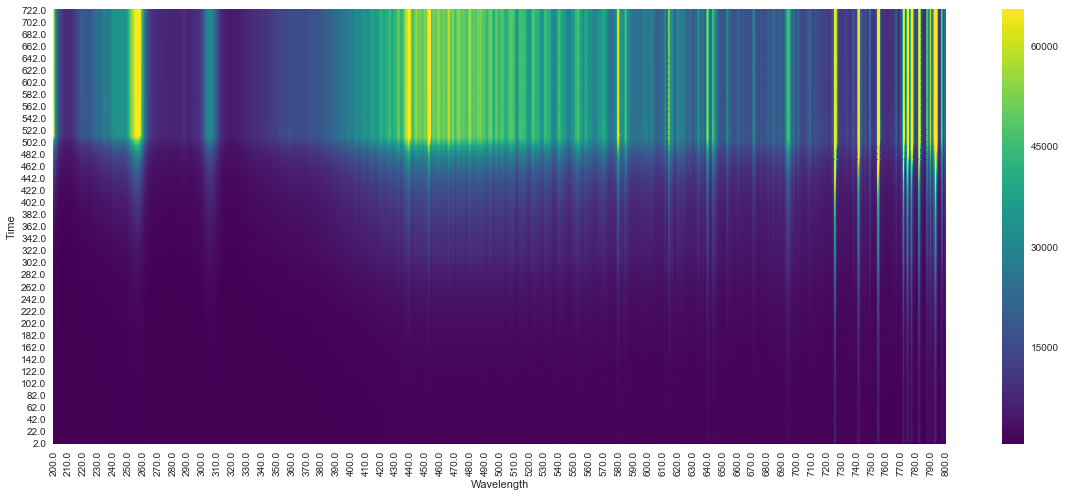

In [9]:
#create seaborn heatmap of data
sns.set_context(rc={"figure.figsize": (20,8)})                                   #increase figure size
ax = sns.heatmap(data_df, xticklabels = 20, yticklabels = 10, cmap='viridis')
ax.invert_yaxis()                                                                #invert Y axis 


### Not a great resolution in the heatmap.  Range of intensity scales from hundreds to >60k.  Let's do a log rescale to see  if the data looks better.


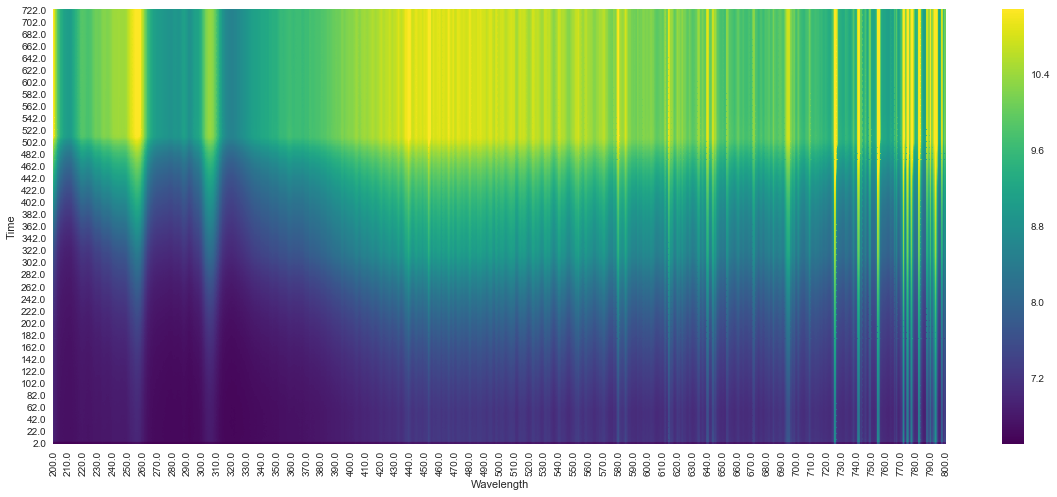

In [10]:
#log scale of data for our heatmap  

ax = sns.heatmap(log(data_df), xticklabels = 20, yticklabels = 10, cmap='viridis')
ax.invert_yaxis()                                                                   #invert Y axis 

In [11]:
#look at the range of data for each column.  What is the max and min range of the columns in the dataset.
range_df = data_df.max() - data_df.min()
print(range_df.max())
print(range_df.min())
#range_df

64781
4539


In [12]:
#scaling the df by subtracting the starting row from all cells, thus each column starts at 0
scaled_df = (data_df - data_df.iloc[0,:] )
print (scaled_df.head())

Wavelength  200.0  200.5  201.0  201.5  202.0  202.5  203.0  203.5  204.0  \
Time                                                                        
2.0             0      0      0      0      0      0      0      0      0   
4.0           204    184    165    146    132    120    111    102     99   
6.0           312    282    252    221    198    178    167    154    146   
8.0           313    280    251    223    200    177    168    157    150   
10.0          315    283    252    223    199    180    163    153    148   

Wavelength  204.5  ...    795.5  796.0  796.5  797.0  797.5  798.0  798.5  \
Time               ...                                                      
2.0             0  ...        0      0      0      0      0      0      0   
4.0            96  ...      346    286    387    981   1402   1182    472   
6.0           143  ...      347    286    389    943   1338   1134    468   
8.0           145  ...      336    279    378    895   1262   1071    449  

In [13]:
#scaling the df by taking the log
log_df = log(data_df)
rangelog_df = (log_df.max()-log_df.min())
print (rangelog_df.min())
print (rangelog_df.max())

2.0402649452
4.46625914312


Log scale is much better.
Total time is 722s
EP time near 510s is evident, remainder of time is what is known as overetch.  This portion determines the etched feature profile and final CD.  We may consider using log_df when performing data analysis later.


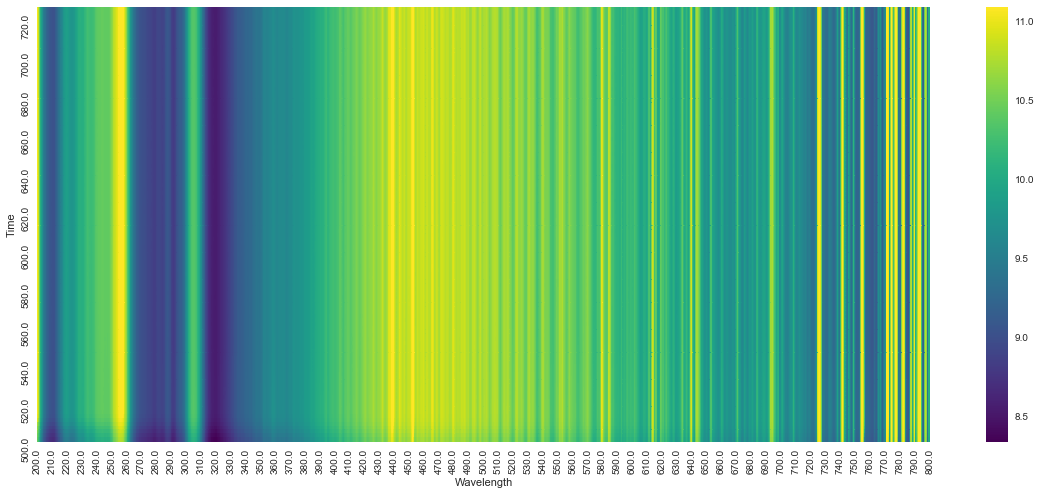

In [14]:
# let's zoom in on the overetch portion >500s.  this shows a bit more detail in the latter third of processing.

df_gt500 = data_df.ix[500:]                                                         #slice from 500s to last row
ax = sns.heatmap(log(df_gt500), xticklabels = 20, yticklabels = 10, cmap='viridis')
ax.invert_yaxis()                                                                   #invert Y axis 

In [15]:
# perform z-score standardization
from sklearn import preprocessing

X_std_scale = preprocessing.StandardScaler().fit_transform(data_df.T)
#X_std_scale = (numpy.array(X_std)) 

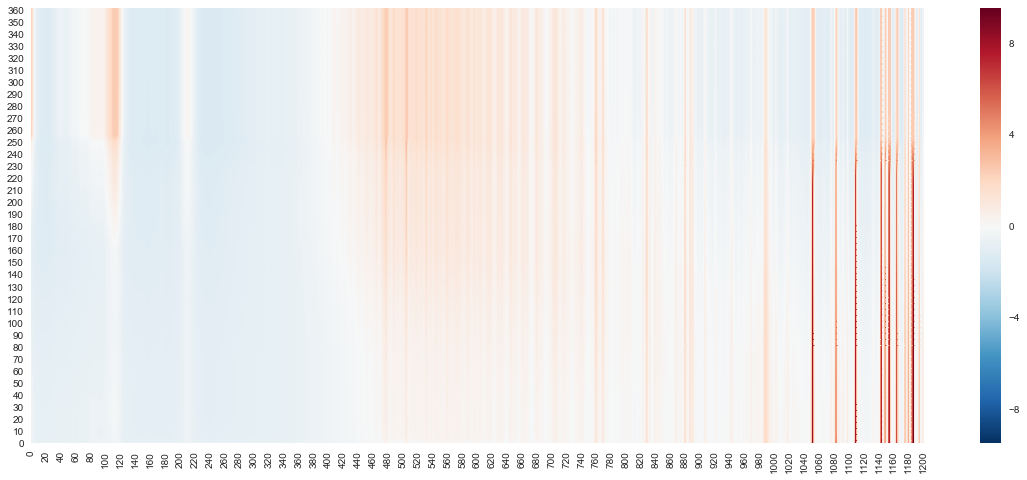

In [16]:
X_std_scale_df = pd.DataFrame(X_std_scale)
ax = sns.heatmap(X_std_scale_df.T, xticklabels = 20, yticklabels = 10)
ax.invert_yaxis()    

##### Z-score normalization with standardscaler function in sklearn will likely be appropriate to scale each spectra.  This will help remove any impact from hardware work and differences that could impact the mean intensity, but not the intensity surface shape.  

### Having looked at the data file for shape and conventions used in the files, we now need to get all the training data from csv files 

In [17]:
'''
need to scroll through my training data and open the csv files into a df.  will store this is a dict of key:value pairs
key = string filename that includes the IMOxxxxxx identifier which will be used to match to 'Error' value 
value = dataframe made up of the csv file data 
'''
import glob
import pprint

dataLists = {}                                                      #initialize our dict to be filled w df's from csv files

for datafile in sorted(glob.glob(r"\\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A7*\*spectra_A_IMO*")):   #use glob to aggregate files/folders into our dict
    '''perform the column indexing and transposing to get each df in correct format.'''
    df = pd.read_csv(datafile)  
    df.rename(columns ={'Run Time':'Time'}, inplace = True)
    df = df.drop('Name', 1)
    df.set_index('Time', inplace = True)
    df.columns.name = 'Wavelength'
    
    '''Need to match the Label categorization for the lots'''
    
    
    
    
    '''End matching'''
    id = str(re.findall('(?<=_A_)[A-Z0-9]+', datafile))
    df = df.iloc[0:350]                                       #will need arrays of all same length so use only the first 350 rows
    dataLists[id] = df                                        #populate dict values with each raw csv file of interest
    #dataLists[id] = log(df)                                   #populate dict values with log value csv
    
    
    #print('datafiles loaded:',datafile)                        #list each file pulled
    #pprint.pprint (glob.glob("Critical_KMONs/*spectra_A*"))        #checking files pulled for debug

#dataLists                                                          #check it if needed for debug
print('Last file opened:',datafile)                                                     #print last filename opened
df.head()                                                           #show the last dataframe loaded into dict

Last file opened: \\Imoshare010\dryetch$\TetraX_DET07_EyeD\OES_csv_spectra_A72\2016-12-30-15-15-07_DET7AEP01_PodC_CHA_KMON_Step0_spectra_A_IMO300836.csv


Wavelength,200.0,200.5,201.0,201.5,202.0,202.5,203.0,203.5,204.0,204.5,...,795.5,796.0,796.5,797.0,797.5,798.0,798.5,799.0,799.5,800.0
Time,,,,,,,,,,,,,,,,,,,,,
2.0,770,757,745,734,724,718,716,712,708,706,...,879,832,913,1317,1604,1454,963,883,1115,1108
4.0,990,960,929,894,870,852,835,829,823,814,...,1248,1131,1332,2410,3173,2775,1484,1271,1876,1865
6.0,1118,1067,1022,979,943,917,899,886,875,864,...,1250,1135,1334,2364,3089,2709,1477,1259,1836,1822
8.0,1121,1069,1022,981,944,916,897,885,875,864,...,1237,1123,1313,2305,3008,2643,1453,1250,1794,1780
10.0,1119,1070,1025,980,944,919,896,885,876,867,...,1228,1120,1312,2279,2957,2597,1440,1240,1777,1762


In [18]:
#we can see the number of data points available that have spectra <- not all of these will have an 'Error' value but all 
#runs with an 'Error' should be found.  Verify later in code.
print (len(dataLists))

491


### The above sequence of code has loaded all of the datasets into a dictionary of dataframes that each represents a run of data that will be labeled according to the corresponding Error for that lot.

In [19]:
'''#pull in the files containing Error data which will be used to define anomylous vs. non-anom '''

raw_Errors = pd.read_csv('Data_Shared_WorkingFile.csv')
raw_Errors.head()

,Entity,Run_On_Ent,Lot,Op,Error,Feature1,Feature2,Feature3,Feature4,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Fam_Type,DIC_Design
0,201A,1,201AKMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN
1,201A,2,201AKMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN
2,201A,3,201AERAT,3504,NaN,600,15,3.0,8.0,1,0,0,0,0,NaN,NaN
3,201A,4,201AKMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN
4,201A,5,201AKMON,3514,NaN,250,70,1.5,4.0,0,1,0,0,1,NaN,NaN


In [20]:
raw_Errors.Error.dropna().describe()

count    3985.000000
mean       -0.073852
std         0.900633
min        -7.700000
25%        -0.544000
50%        -0.048000
75%         0.453000
max         6.467000
Name: Error, dtype: float64

### 'raw_Errors' dataframe has a target column called 'Error' which is being used to demark which points are defined as anomylous vs non-anom.  The absolute value of distance to zero is the metric I will used here.  I will use a 2sigma cutoff to assign 

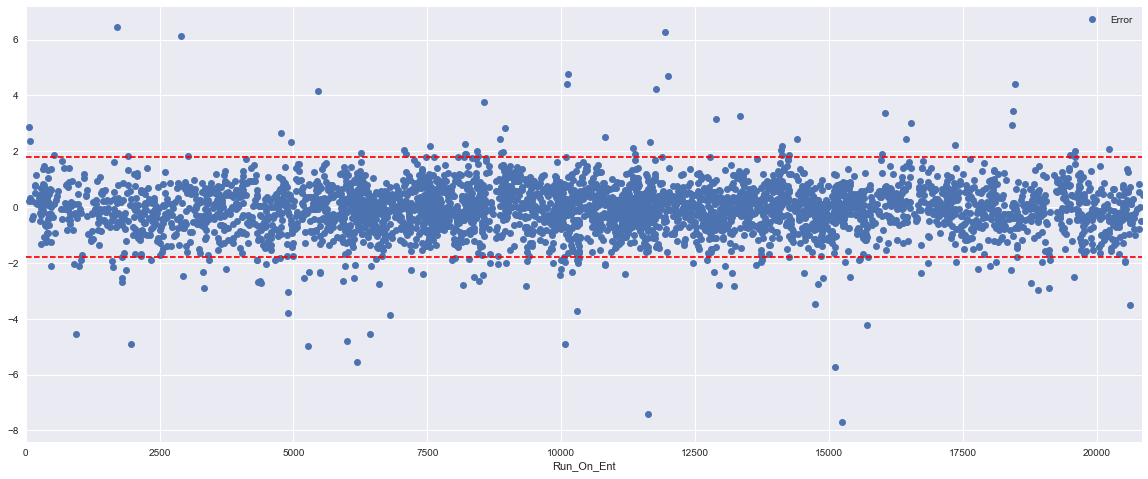

In [21]:
'''scatterplot with 2s cutoff lines shown'''
stdcut = 2   #number of standard deviation to draw the cutoff for anomalous pts.
cutoff = stdcut * raw_Errors.Error.std()
raw_Errors.plot(x = 'Run_On_Ent', y = 'Error', style = 'o')
plt.axhline(y=-cutoff, c = 'r', linestyle = '--')
plt.axhline(y=cutoff, c = 'r', linestyle = '--')

In [22]:
'''
Cell creates a new dataframe with the data pts labeled as anomylous = 1, non-anom = 0
'''
raw_Errors2 = raw_Errors.set_index('Run_On_Ent').dropna()                  #reset index to run order
clas_Errors = raw_Errors2[['Entity','Lot','Error']].copy()                 #copy columns needed for analysis to new df
clas_Errors["Label"] = np.where(abs(clas_Errors['Error']) > cutoff, 1, 0)  #classify pt as anom or non-anom
                              
#clas_Errors.set_index('Lot', inplace = True)
clas_Errors.loc[clas_Errors['Label'] == 1].count()                                 #show anomylous rows ('Label' = 1)


Entity    165
Lot       165
Error     165
Label     165
dtype: int64

In [23]:
print ('number of possible outliers:', len(clas_Errors.loc[clas_Errors['Label'] == 1]))
clas_Errors = clas_Errors.reset_index()
clas_Errors.loc[clas_Errors['Label'] == 1].head()

number of possible outliers: 165


,Run_On_Ent,Entity,Lot,Error,Label
21,948,201A,276641,-4.560,1
25,996,201A,275490,-2.118,1
50,1606,201A,278998A,-1.940,1
52,1640,201A,279443,-2.150,1
58,1801,201A,280005,-2.678,1


### we can see there will be 165 anomalous pts possible in the Errors data.  They must have a match to the  datafiles available in dataLists.  

In [24]:
print (type(clas_Errors)) 

<class 'pandas.core.frame.DataFrame'>


In [25]:
print (type(dataLists)) 
print (len(dataLists))

<class 'dict'>
491


In [26]:
#checking and saving matches between Errors and spectra available.
dataLists2 = {}
matchcounter = 0
missingcounter = 0
for k in dataLists:
    #print ('k=',k)
    id = re.findall('(?<=IMO)[A-Z0-9]+', k)[0]
    #print('id=',id)
    ndf = clas_Errors[clas_Errors.Lot == id]    ###clas_Errors.index if we index in the table of cell above
    if len(ndf) > 0:
        category = (ndf.iloc[-1]['Label'])
        error = (ndf.iloc[-1]['Error'])
        run = (ndf.iloc[-1]['Run_On_Ent'])
        dataLists2[k] = (category, run, error, dataLists[k])
        matchcounter +=1
        #print(dataLists2[k])
    else: 
        '''Lot not in dataLists'''
        #dataLists2[k] = (None, dataLists[k])  --> don't keep non-matching data
        missingcounter += 1
        #print ('not found', id)
        continue
print ('missing', missingcounter)
print ('match', matchcounter)
#dataLists2

missing 90
match 401


In [27]:
#what does the first value in the dictionary look like.  We should see label, runonent, Error, and the spectra
next (iter (dataLists2.values()))


(0,
 19195,
 1.147,
 Wavelength  200.0  200.5  201.0  201.5  202.0  202.5  203.0  203.5  204.0  \
 Time                                                                        
 2.0           743    734    725    715    705    700    696    696    695   
 4.0           966    933    902    875    851    834    821    811    803   
 6.0          1069   1027    986    943    915    892    875    862    852   
 8.0          1070   1027    986    948    913    889    871    858    850   
 10.0         1068   1025    986    947    913    889    871    858    849   
 12.0         1068   1024    984    944    914    889    870    859    851   
 14.0         1074   1030    987    947    912    895    874    859    848   
 16.0         1070   1026    983    945    913    889    873    859    848   
 18.0         1075   1031    987    945    915    895    871    858    848   
 20.0         1073   1029    989    952    916    891    873    858    849   
 22.0         1073   1030    989    949    9

In [28]:
y = {} # our labels
X = {} # our spectra data
E = {}
cnt = 0
looper = 0
for k,(label, run, error, spectra) in dataLists2.items():
    #if looper == 0 : 
    #    print('first key',k)
    #    looper += 1
    
    ##########
    # Standard Scaler normalization of trace
    X_std = preprocessing.StandardScaler().fit_transform(spectra.T)
    X_std_df = pd.DataFrame(X_std)   
    ##########
    
    y[k] = label
    X[k] = X_std_df.T
    E[k] = run, error
    if label == 1: cnt +=1
    last = k
print ('last key', k)
#X[k].head()
y_lotlabel = dict(y)

print ('found anomylous pts:', cnt)
print ('total pts:', len(y))
y_lotlabel.values()

last key ['IMO306492']
found anomylous pts: 13
total pts: 401


dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [29]:
next (iter (X.values()))
type(X)
type(y)

dict

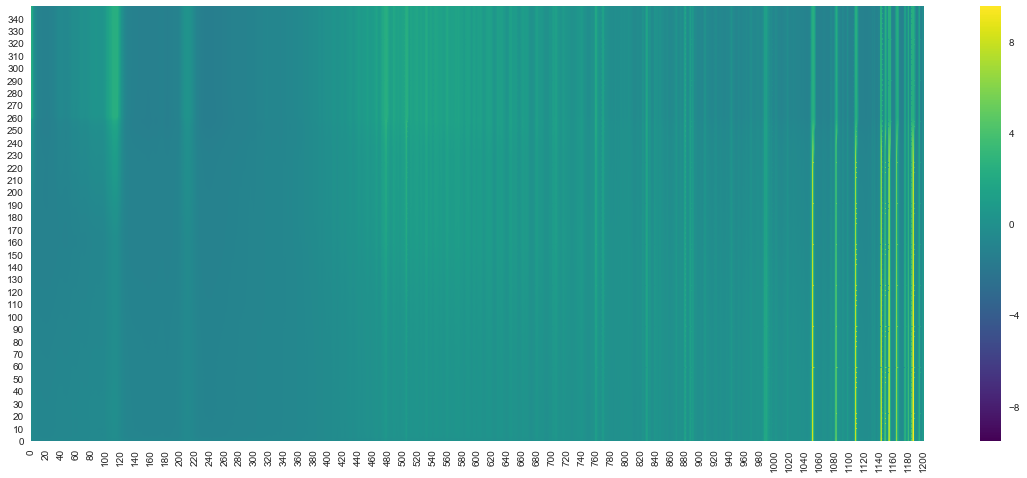

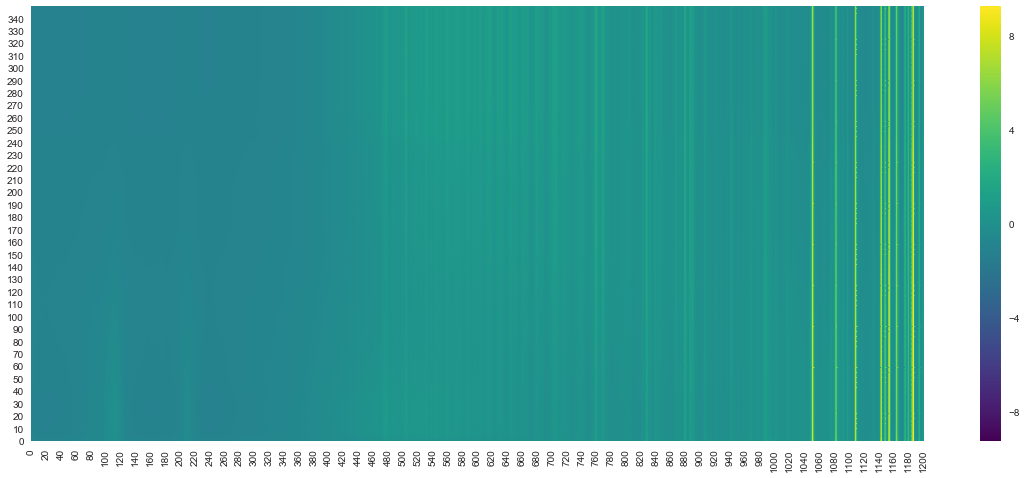

In [30]:
#########################
# look at first and last heatmaps after standard scaler applied
#########################
ax1 = sns.heatmap(next(iter (X.values())), xticklabels = 20, yticklabels = 10, cmap='viridis')
ax1.invert_yaxis()  
show(ax1)
ax2 = sns.heatmap(X.get(k), xticklabels = 20, yticklabels = 10, cmap='viridis')
ax2.invert_yaxis()  
show(ax2)

In [31]:
print('length of X should match 401:', len(X))

length of X should match 401: 401


### unpack the dictionary tuples to make numpy arrays of the values for labels and spectra and prep the data formats into ndarrays suitable for sklearn modules.

In [145]:
y = [] # our labels list
X = [] # our spectra data
y_lotlabel2 = {}

for k,(label, run, error, spectra) in dataLists2.items():
    
    ##########
    # Standard Scaler normalization of trace
    X_std = preprocessing.StandardScaler().fit_transform(spectra.T)
    ##########
    #print(type(X_std))
    #np_X_std = numpy.array(X_std)
   
    nx,ny = X_std.shape
    d2_np_X_std = X_std.reshape(nx*ny)
    #print(d2_np_X_std.dtype)
    items = [label, run, error, d2_np_X_std]
    
    y.append(label)
    X.append(X_std)
    y_lotlabel2[k] = items

    last = k
    
y = (numpy.array(y))  
X = (numpy.array(X))       #give me a 3-D array (124,350,1201)
print('X shape:', X.shape)
print('y shape:', y.shape)
#print(X)

# sklearn will require 2D array for data input so we will flattend 3D array to 2D 350x1201 = 42350
nsamples,nx,ny = X.shape
d2_X = X.reshape((nsamples,nx*ny))
print('reshaped d2_X:', d2_X.shape)
print('labels y shape:', len(y))
print('X shape:', X.shape)
#print('last spectra array \n',X[-1])

X shape: (401, 1201, 350)
y shape: (401,)
reshaped d2_X: (401, 420350)
labels y shape: 401
X shape: (401, 1201, 350)


In [146]:
Xy_lotlabel2_df = pd.DataFrame.from_dict(y_lotlabel2, orient = 'index')
Xy_lotlabel2_df = Xy_lotlabel2_df.reset_index()
Xy_lotlabel2_df = Xy_lotlabel2_df.rename(columns = {0:'label', 1:'Run_on_Ent', 2:'Error', 3:'spectra', 'index':'ID'})
print (len(Xy_lotlabel2_df))
Xy_lotlabel2_df.head()

401


,ID,label,Run_on_Ent,Error,spectra
0,['IMO305019'],0,19195,1.147,"[-0.43918316452, -0.436827938834, -0.342291473..."
1,['IMO308131'],0,19253,1.017,"[-0.462030448379, -0.444774844779, -0.34577927..."
2,['IMO308056'],0,19258,-0.391,"[-0.481539223596, -0.449705407399, -0.34887932..."
3,['IMO306885'],0,19266,0.558,"[-0.477379130402, -0.452607081376, -0.35309836..."
4,['IMO308310'],0,19303,0.622,"[-0.471434472509, -0.437120954359, -0.35001577..."


In [147]:
Xy_lotlabel2_df.dtypes

ID             object
label           int64
Run_on_Ent      int64
Error         float64
spectra        object
dtype: object

In [148]:
Xy_lotlabel2_df.loc[0,'spectra']

array([-0.43918316, -0.43682794, -0.34229147, ..., -0.35242909,
       -0.35176249, -0.35225925])

In [149]:
#convert the spectra object in df to np that will be use PCA
Xz = np.array(list(Xy_lotlabel2_df.loc[:,'spectra']), dtype=np.float)

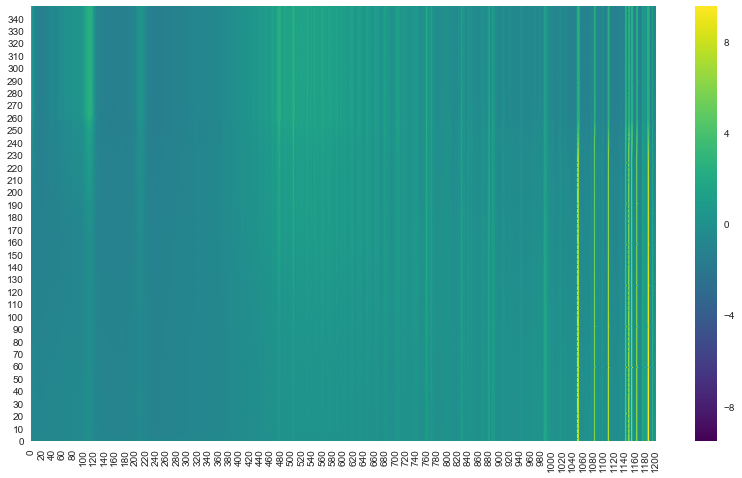

In [150]:
ax1 = sns.heatmap(X[0].T, xticklabels = 20, yticklabels = 10, cmap='viridis')
ax1.invert_yaxis()  
show(ax1)

# Run all above here

### what groupings does PCA feature reduction followed by SVM classifier give in unsupervised format?

In [151]:
# we will run PCA formatted to retain 3 components 
# this will get us to 3D in this short example.

from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_reduced = pca.fit_transform(Xz)
print (X_reduced.shape)
print (X_reduced)

(401, 3)
[[ 201.28947346   22.32339839   22.35639665]
 [ 215.19891957   22.10378114  -22.33617325]
 [ 206.61615274   19.06882683    3.95654567]
 ..., 
 [-102.14710126   23.89604404    2.60019728]
 [-102.32913247   24.28493184    3.35358885]
 [ -99.9936681    22.32776477   -1.99404325]]


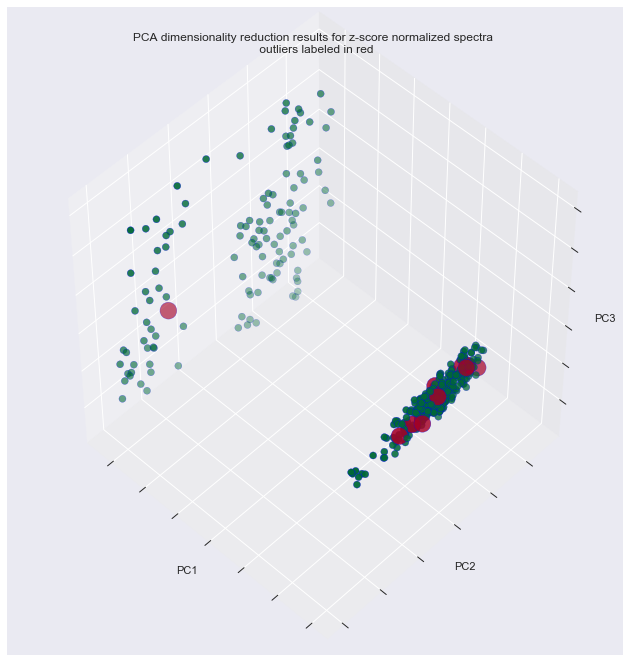

In [152]:
########################################
# Here we will plot the components and also show the labels from our dataset for reference
#######################################
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(1, figsize=(9, 9))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
area = 50+75*np.pi*y

#for name, label in [('normal', 0), ('Anomaly', 1)]:
#    ax.text3D(X_reduced[y == label, 0].mean(), X_reduced[y == label, 1].mean()+1.5, s = name, z = 0,
#              horizontalalignment='center', verticalalignment='center',
#              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results
z = np.choose(Xy_lotlabel2_df['label'], [1,0])

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:,2], c=z, cmap=plt.cm.RdYlGn, s = area, edgecolor='b')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA dimensionality reduction results for z-score normalized spectra \n outliers labeled in red')
plt.show()
    

### We can see 2 or 3 very distinct groupings that do not split well w the outlier labels.  Is something else going on?  Let's look at time trend for these pts.


In [153]:
from sklearn.cluster import KMeans
kmeans_pred = KMeans(n_clusters=3, random_state=0).fit(X_reduced)
kmeans_pred.labels_


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:865: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


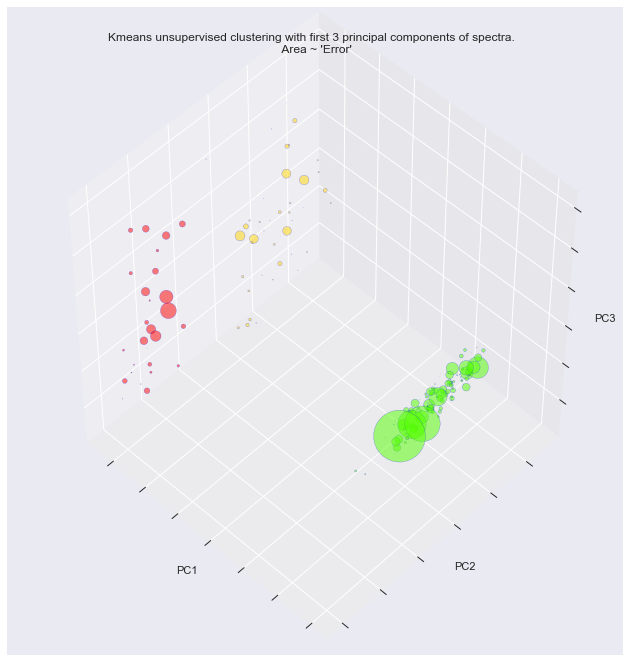

In [154]:
fig = plt.figure(1, figsize=(9, 9))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
#area = 50+75*np.pi*y
area = 10*np.pi*Xy_lotlabel2_df['Error']**3
z = np.choose(kmeans_pred.labels_, [2,1,0])
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:,2], c=z, cmap = 'prism', edgecolor='b', s = area, alpha = 0.5)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title("Kmeans unsupervised clustering with first 3 principal components of spectra.  \n Area ~ 'Error'")

plt.show()

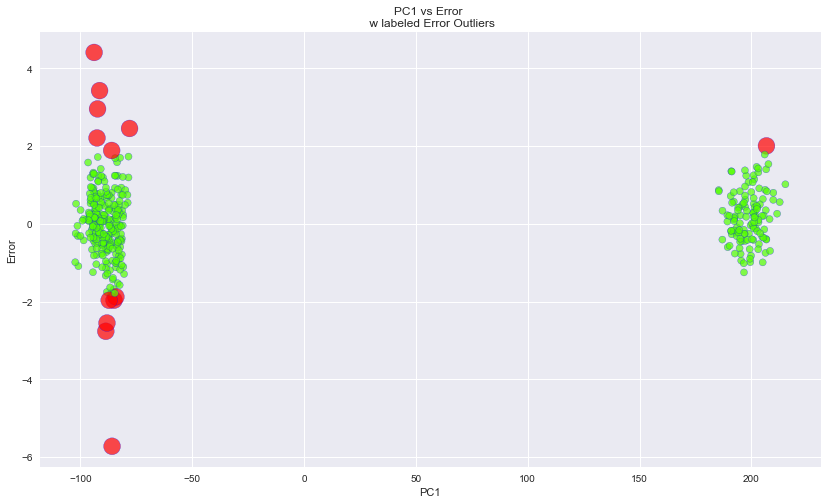

In [155]:
plt.figure()
z = np.choose(Xy_lotlabel2_df['label'], [1,0])
area = 50+75*np.pi*y
plt.scatter(X_reduced[:, 0], Xy_lotlabel2_df['Error'], marker='o', c=z, cmap='prism', edgecolor='b', s= area, alpha=0.7)
plt.title('PC1 vs Error \n w labeled Error Outliers')
plt.xlabel('PC1')
plt.ylabel('Error')

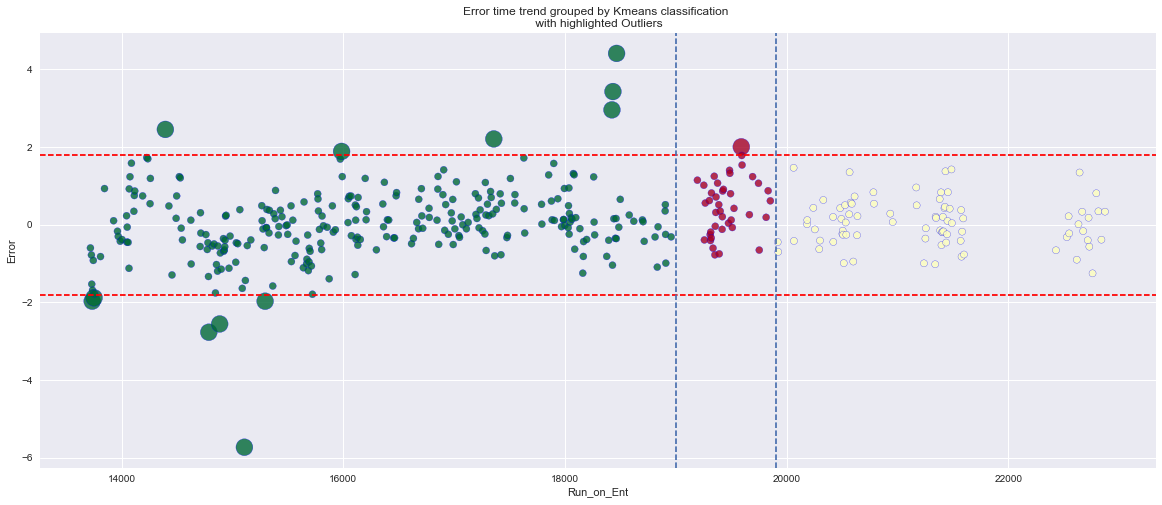

In [156]:
sns.set_context(rc={"figure.figsize": (20,8)})    
z = np.choose(kmeans_pred.labels_, [2,1,0])
xpts = Xy_lotlabel2_df['Run_on_Ent']
ypts = Xy_lotlabel2_df['Error']
plt.figure()
plt.scatter(xpts, ypts, marker='o', c=z, cmap=plt.cm.RdYlGn, edgecolor='b', alpha = 0.8, s = area)
plt.xlabel('Run_on_Ent')
plt.ylabel('Error')
plt.axhline(y=-cutoff, c = 'r', linestyle = '--')
plt.axhline(y=cutoff, c = 'r', linestyle = '--')
plt.axvline(x=19000, linestyle = '--')
plt.axvline(x=19900, linestyle = '--')
plt.title('Error time trend grouped by Kmeans classification \n with highlighted Outliers')

### We can see fairly distinct kmeans clusters correlate to time oof the Run_on_Ent which is indicative of a hardware change dominating the clustering.  Consultation with customer expert indeed confirms that there were hardware events correlating to these two dates.  Knowing this, we will attempt to perform a train/test split on the first green cluster ranging from 13.5k < Run_on_Et < 19k

In [157]:
#filter dataframe for train/test split
Xy_filt_df = Xy_lotlabel2_df[Xy_lotlabel2_df['Run_on_Ent'] <19000]
Xy_filt_df = Xy_filt_df.reset_index()
y_filt = np.array(Xy_filt_df['label'])
Xy_filt_df.head(10)

,index,ID,label,Run_on_Ent,Error,spectra
0,124,['IMO291722B'],0,13719,-0.597,"[-0.78844832564, -0.776999389838, -0.817914219..."
1,125,['IMO292179'],0,13728,-0.778,"[0.383732806628, -0.823499423799, -0.794922678..."
2,126,['IMO291986'],0,13731,-1.528,"[-0.832396424028, -0.788246696793, -0.81418683..."
3,127,['IMO291979'],1,13735,-1.966,"[-0.795024618275, -0.778439737125, -0.82512024..."
4,128,['IMO291981'],0,13738,-1.685,"[-0.809655116035, -0.788307685757, -0.81978133..."
5,129,['IMO291230C'],0,13745,-0.918,"[-0.79106616374, -0.782645953259, -0.817423795..."
6,130,['IMO291983'],1,13752,-1.879,"[-0.802123458767, -0.789469358389, -0.81164542..."
7,131,['IMO292990'],0,13757,-1.776,"[-0.819083400626, -0.791714470619, -0.82260001..."
8,132,['IMO292807'],0,13810,-0.819,"[-0.819674422331, -0.809657581988, -0.83009760..."
9,133,['IMO290776A'],0,13846,0.931,"[-0.817747681954, -0.794350181417, -0.82653325..."


In [158]:
X_filt = np.array(list(Xy_filt_df.loc[:,'spectra']), dtype=np.float)

In [159]:
print(len(y_filt), len(X_filt))

277 277


In [160]:
print(X_filt.dtype, y_filt.dtype)
len(X_filt)

float64 int64


277

### how many dimensions are needed to keep >95% variance?

The minimum number of dimensions to retain 95% variance =  24
[ 40.38  56.53  67.13  73.45  77.98  81.45  84.45  86.7   88.47  89.73
  90.62  91.26  91.74  92.2   92.59  92.94  93.27  93.57  93.86  94.14
  94.41  94.65  94.88  95.1   95.3   95.5   95.69  95.87  96.04  96.2 ]


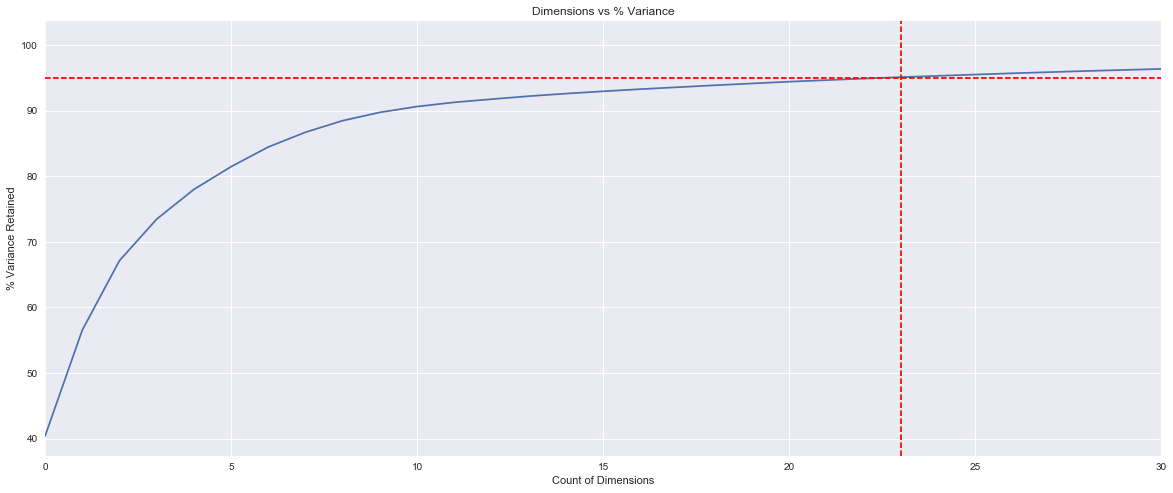

In [161]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

#this code snip will calculate the number of dimensions for PCA to retain 95% of variance in X
pca = PCA()
pca.fit((X_filt))     #this line will run on the flattened d2_X

var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)  
d = np.argmax(var1 >= 95) + 1            
print ('The minimum number of dimensions to retain 95% variance = ',d)
print (var1[:30])
# Let's plot the explained variance vs dimensions
plt.plot(var1)
plt.xlabel('Count of Dimensions')
plt.ylabel('% Variance Retained')
plt.axhline(y=95, c = 'r', linestyle = '--')
plt.axvline(x=23, c = 'r', linestyle = '--')
plt.xlim([0,30])
plt.title('Dimensions vs % Variance')
#note the dimensions start at 0, so 95% is +1

### SVM on train/test splits

In [162]:
#stratified shuffle split k-fold for preserving relative class frequencies is preserved in train and validation folds
#this is more appropriate for large imbalance of target class such as anomaly detection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.base import clone
from sklearn.metrics import average_precision_score
from sklearn.svm import SVC

pca = PCA(n_components = 24)  #from PCA on X_filt to retain 0.95 variance
svm = SVC(kernel = 'rbf', degree = 3, gamma = 0.1, C=0.1)

#############################
#split the data with stratified shuffle split
sss = StratifiedShuffleSplit(n_splits = 3, test_size = 0.50, random_state = 42)
#############################

for train_index, test_index in sss.split(X_filt,y_filt):
    
    X_train_folds = X_filt[train_index]
    y_train_folds = y_filt[train_index]
    X_test_folds  = X_filt[test_index]
    y_test_folds  = y_filt[test_index]
    
    X_train_folds_red = pca.fit_transform(X_train_folds)  #fit transfrom on test
    X_test_folds_red = pca.transform(X_test_folds)  #transform test from train fit
    
    svm.fit(X_train_folds_red, y_train_folds)
    y_pred = svm.predict(X_test_folds_red)
    
    print ('Pred label:', y_pred)
    print ('Test label:', y_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print ('raw ratio score', n_correct / len(y_pred))
    y_score_init = svm.decision_function(X_test_folds_red)
    average_precision_init = average_precision_score(y_test_folds, y_score_init)
    print ('average precision recall score using reduced PCA:', average_precision_init)

Pred label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Test label: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
raw ratio score 0.956834532374
average precision recall score using reduced PCA: 0.0571489762329
Pred label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Test label: [0 0 0

### PCA-SVM ensemble does not appear to be able to accurately predict outliers for a supervised model.  Let's check algoithms that may work better for anomaly detection.

# Isolation Forest for anomaly detection


In [163]:
#split data into benign/malign  for use in anomaly algorithms
X_benign = Xy_filt_df[Xy_filt_df['label']==0].spectra
X_malign = Xy_filt_df[Xy_filt_df['label']==1].spectra

# save csv and send to R for conditional Ttest to find the features that matter the most
d2_x_good = np.array(list(X_benign), dtype=np.float)
d2_y_anom = np.array(list(X_malign), dtype=np.float)
numpy.savetxt('y_anom.csv', d2_y_anom ,fmt='%f', delimiter=',')
numpy.savetxt('x_good.csv', d2_x_good, fmt='%f', delimiter=',')

from sklearn.model_selection import train_test_split
X_train_benign, X_test_benign = train_test_split(X_benign, test_size=0.2, random_state=42)

In [164]:
X_train_benign = np.array(list(X_train_benign), dtype=np.float)
X_test_benign = np.array(list(X_test_benign), dtype=np.float)
X_malign = np.array(list(X_malign), dtype=np.float)


X_train_benign_red = pca.fit_transform(X_train_benign)  #PCA fit_transform on training set
X_test_benign_red = pca.transform(X_test_benign)        #PCA tranfsorm on test data
X_malign_red = pca.transform(X_malign)             #PCA transform on malign test data


In [165]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(X_train_benign_red)
y_pred_train = clf.predict(X_train_benign_red)
y_pred_test = clf.predict(X_test_benign_red)
y_pred_outliers = clf.predict(X_malign_red)

n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
TP_outliers = y_pred_outliers[y_pred_outliers == -1].size
TP_train = y_pred_train[y_pred_train == 1].size
TP_test = y_pred_test[y_pred_test == 1].size

print('y_pred_train recall:', round(TP_train/len(y_pred_train),4))
print('y_pred_test recall:', round(TP_test/len(y_pred_test),4))
print('y_pred_outliers recall', round(TP_outliers/len(y_pred_outliers),4))
y_pred_outliers

y_pred_train recall: 0.8962
y_pred_test recall: 0.9245
y_pred_outliers recall 0.1667


array([-1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1])

# 1-class SVM for anomaly detection

Best gamma, anomaly recall on malign test set (0.10000000000000001, 1.0)
Best gamma, benign recall on benign test set (0.001, 0.9433962264150944)


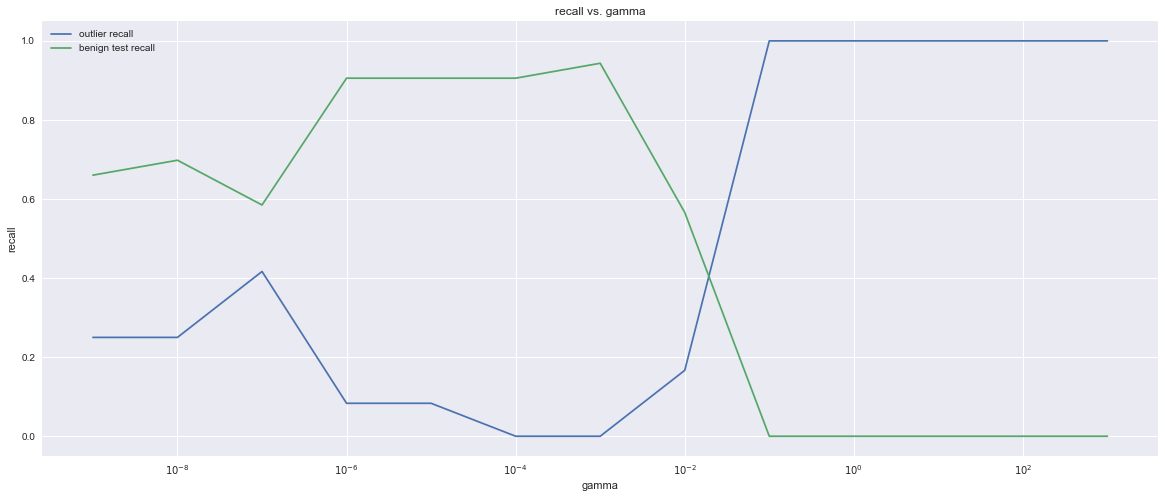

In [172]:
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score

malign_results = {}
benign_results = {}
#grid = {'gamma' : np.logspace(-9, 3, 13),
#        'nu' : np.linspace(0.01, 0.99, 99)}
nu = len(X_malign)/len(X_benign)  #nu is proportion of outliers in dataset
gammas = np.logspace(-9, 3, 13)

for gamma in gammas:
    #fit model
    clf = svm.OneClassSVM(gamma = gamma, nu = nu, kernel = 'rbf')  #uses rbf kernel default
    clf.fit(X_train_benign_red)
    y_pred_train = clf.predict(X_train_benign_red)
    y_pred_test = clf.predict(X_test_benign_red)
    y_pred_outliers = clf.predict(X_malign_red)
    #print ('nu:', round(nu,2), '  ', 'gamma:', gamma)
    
    n_error_train = y_pred_train[y_pred_train == -1].size
    n_error_test = y_pred_test[y_pred_test == -1].size
    n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
    TP_outliers = y_pred_outliers[y_pred_outliers == -1].size
    TP_train = y_pred_train[y_pred_train == 1].size
    FN_train = y_pred_train[y_pred_train == -1].size
    TP_test = y_pred_test[y_pred_test == 1].size
    malign_recall = TP_outliers/len(y_pred_outliers)
    malign_results[gamma] = malign_recall
    benign_recall = TP_test/len(y_pred_test)
    benign_results[gamma] = benign_recall
    
    #print('y_pred_outliers recall:', round(malign_recall,4))
    #print('y_pred_train recall:', round(TP_train/len(y_pred_train), 4))
    #print('y_pred_test recall:', round(TP_test/len(y_pred_test),4))

print('Best gamma, anomaly recall on malign test set', max(malign_results.items(), key=lambda k: k[1]))  
print('Best gamma, benign recall on benign test set', max(benign_results.items(), key=lambda k: k[1]))  
#print (benign_results)
lists1 = sorted(malign_results.items()) # sorted by key, return a list of tuples
lists2 = sorted(benign_results.items())
x1, y1 = zip(*lists1) # unpack a list of pairs into two tuples
x2, y2 = zip(*lists2)
plt.semilogx(x1, y1)
plt.semilogx(x2, y2)
plt.xlabel('gamma')
plt.ylabel('recall')
plt.title('recall vs. gamma')
plt.legend(['outlier recall', 'benign test recall'], loc='upper left')
plt.show()

### We can see the optimal recall for both benign and outlier detection is near 0.5 which is near guessing.  However, the cost of a false negative TypeII error on malign data pts it higher than time wasted on TypeI Error.  Best  outlier recall at ~100% lead to a near 100% false positive on benign. 

# Histogram of oriented Gradients and Manifold Learning dimensionality reduction for anomaly detection

In [ ]:
#focus on the single run time which PCA did not detect a gross shift from hardware work.
#use raw unormalized spectra images
print (Xy_filt_df.shape)
Xy_filt_df.head()

In [40]:
y = [] # our labels list
X = [] # our spectra data
y_lotlabel3 = {}

for k,(label, run, error, spectra) in dataLists2.items():
    #print(k)
    ##########
    # Standard Scaler normalization of trace
    #X_std = preprocessing.StandardScaler().fit_transform(spectra.T)
    ##########
    #print(type(X_std))
    #np_X = numpy.array(X)
    #nx,ny = np_X.shape
    #d2_np_X = np_X.reshape(nx*ny)
    #print(d2_np_X_std.dtype)
    items = [label, run, error, spectra.values]
    
    y.append(label)
    X.append(spectra.values)
    y_lotlabel3[k] = items

    last = k
    
y = (numpy.array(y))  
X = (numpy.array(X))       #give me a 3-D array (124,350,1201)
print('X shape:', X.shape)
print('y shape:', y.shape)
#print(X)

# sklearn will require 2D array for data input so we will flattend 3D array to 2D 350x1201 = 42350
nsamples,nx,ny = X.shape
d2_X = X.reshape((nsamples,nx*ny))
print('reshaped d2_X:', d2_X.shape)
print('labels y shape:', len(y))
print('X shape:', X.shape)
print('last spectra array \n',X[-1])

X shape: (401, 350, 1201)
y shape: (401,)
reshaped d2_X: (401, 420350)
labels y shape: 401
X shape: (401, 350, 1201)
last spectra array 
 [[  680   679   678 ...,   781   878   882]
 [  736   730   724 ...,   977  1223  1231]
 [  759   750   744 ...,   981  1210  1220]
 ..., 
 [  780   770   763 ...,  5939 10884 10695]
 [  779   769   763 ...,  5941 10877 10697]
 [  780   772   766 ...,  5948 10886 10692]]


In [42]:
Xy_lotlabel3_df = pd.DataFrame.from_dict(y_lotlabel3, orient = 'index')
Xy_lotlabel3_df = Xy_lotlabel3_df.reset_index()
Xy_lotlabel3_df = Xy_lotlabel3_df.rename(columns = {0:'label', 1:'Run_on_Ent', 2:'Error', 3:'spectra', 'index':'ID'})
print (len(Xy_lotlabel3_df))
Xy_lotlabel3_df.head()

401


,ID,label,Run_on_Ent,Error,spectra
0,['IMO305019'],0,19195,1.147,"[[743, 734, 725, 715, 705, 700, 696, 696, 695,..."
1,['IMO308131'],0,19253,1.017,"[[753, 743, 732, 721, 714, 708, 704, 701, 700,..."
2,['IMO308056'],0,19258,-0.391,"[[753, 742, 733, 724, 714, 709, 705, 704, 702,..."
3,['IMO306885'],0,19266,0.558,"[[753, 742, 733, 722, 711, 710, 704, 701, 700,..."
4,['IMO308310'],0,19303,0.622,"[[752, 741, 731, 722, 708, 708, 704, 703, 701,..."


In [43]:
#filter dataframe for train/test split
Xy_filt_df = Xy_lotlabel3_df[Xy_lotlabel3_df['Run_on_Ent'] <19000]
Xy_filt_df = Xy_filt_df.reset_index()
y_filt = np.array(Xy_filt_df['label'])
Xy_filt_df.head(10)

,index,ID,label,Run_on_Ent,Error,spectra
0,124,['IMO291722B'],0,13719,-0.597,"[[678, 677, 675, 672, 667, 667, 667, 669, 670,..."
1,125,['IMO292179'],0,13728,-0.778,"[[650, 650, 650, 649, 648, 646, 646, 650, 651,..."
2,126,['IMO291986'],0,13731,-1.528,"[[660, 660, 660, 657, 656, 656, 656, 657, 658,..."
3,127,['IMO291979'],1,13735,-1.966,"[[677, 675, 675, 673, 670, 668, 667, 667, 668,..."
4,128,['IMO291981'],0,13738,-1.685,"[[676, 675, 674, 671, 670, 668, 668, 668, 669,..."
5,129,['IMO291230C'],0,13745,-0.918,"[[679, 676, 676, 674, 669, 670, 668, 671, 672,..."
6,130,['IMO291983'],1,13752,-1.879,"[[678, 676, 677, 674, 670, 668, 670, 671, 671,..."
7,131,['IMO292990'],0,13757,-1.776,"[[676, 675, 675, 672, 670, 669, 668, 666, 665,..."
8,132,['IMO292807'],0,13810,-0.819,"[[683, 681, 678, 675, 674, 674, 672, 673, 674,..."
9,133,['IMO290776A'],0,13846,0.931,"[[679, 678, 677, 676, 672, 669, 669, 671, 672,..."


In [44]:
print (len(Xy_filt_df))

277


#### We have 277 data pts where we want to treat the spectra as images for dimensionality reduction in HOG

In [48]:
#grab all the spectra for our 277 pts
X_spectra = np.array(list(Xy_filt_df.loc[:,'spectra']), dtype = np.float)
print(type(X_spectra))
#X_spectra.shape
X_images = X_spectra
X_images.shape

<class 'numpy.ndarray'>


(277, 350, 1201)

#reshape each flattened spectra into np array of the image
X_images = []
for row in range(len(X_spectra)):
    #print(row)
    some_spectra = np.reshape(X_spectra[row], (1201,-1))
    X_images.append(some_spectra)  #list of spectra
X_images = (numpy.array(X_images))  
X_images.shape

C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


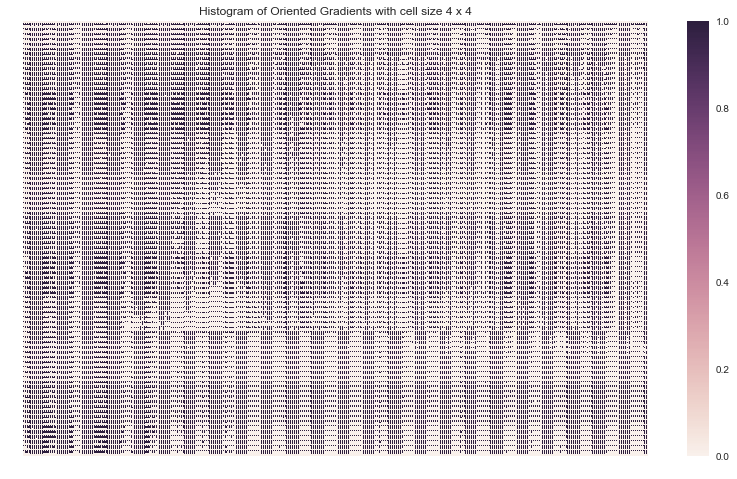

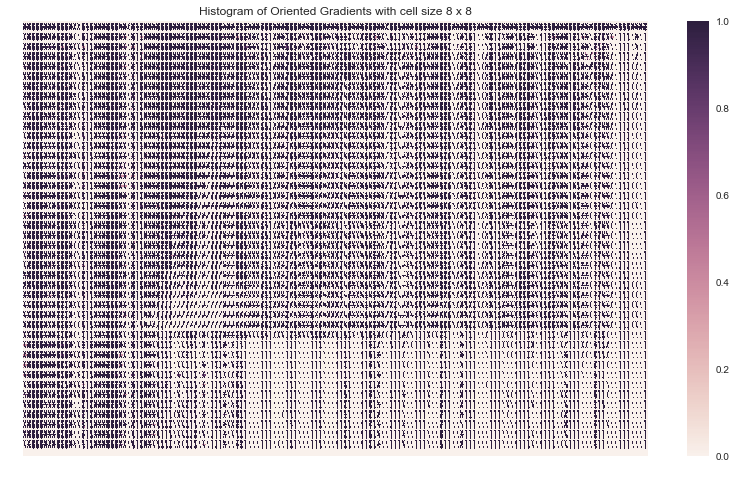

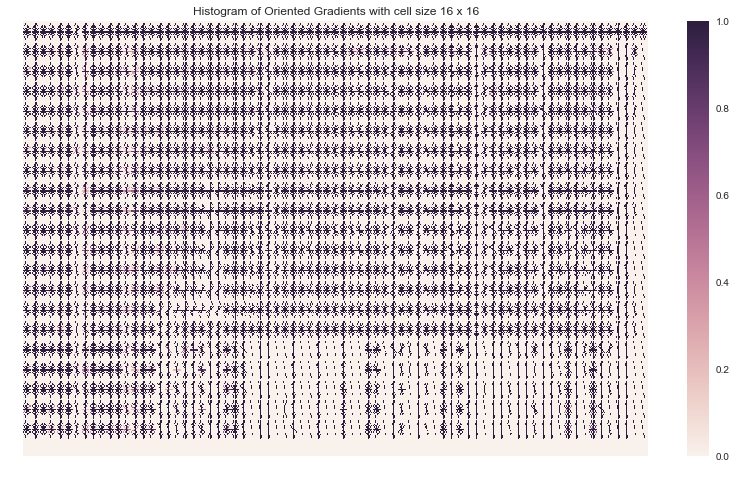

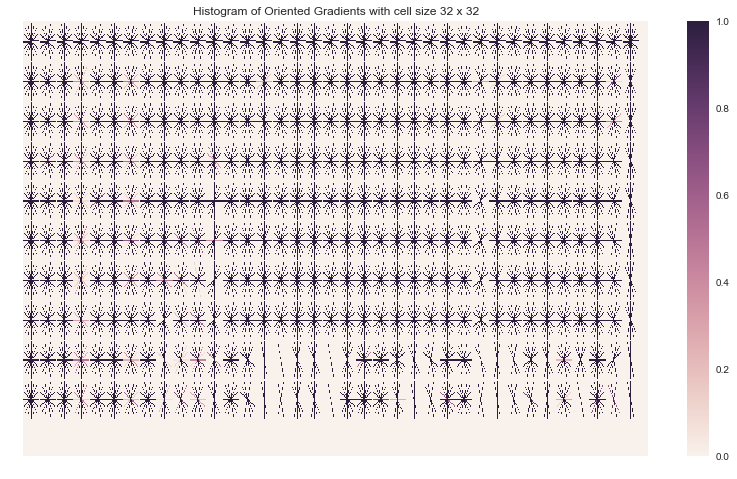

In [49]:
from skimage.feature import hog
from skimage import data, color, exposure

# check hog of first imgage across several cell pixel resolutions 
# note these images were normalized

image = X_images[0]
ppcs = (4,8,16,32)
cnt = 0
hog_image_rescaled = {}
sns.set_context(rc={"figure.figsize": (14,8)}) 

for cell in ppcs:
    
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(cell, cell),
                        cells_per_block=(1, 1), visualise=True)
    # Rescale histogram for better display
    ax = plt.axes()
    ax.axis('off')
    hog_image_rescaled[cnt] = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))
    sns.heatmap(hog_image_rescaled[cnt], ax = ax)#, cmap='viridis')
    ax.set_title('Histogram of Oriented Gradients with cell size %i x %i' %(cell,cell))
    #ax.title('Histogram of Oriented Gradients with cell size {} x {}'.format(cell))
    plt.show()
    cnt += 1

#### optical emission spectra don't really have defined edges so I will use high resolution 4x4 pixel per cell

In [50]:
from skimage.feature import hog
from skimage import data, color, exposure

# get feat vector of all the heatmaps using cell size 4x4

hog_image_rescaled = []
feat_vect = []

for row in range(len(X_images)):
    image = X_images[row]
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(4, 4),
                        cells_per_block=(1, 1), visualise=True)
    feat_vect.append(fd)
    #hog_image_rescaled[k] = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))
    

C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [51]:
FV = np.array(feat_vect)
FV.shape

(277, 208800)

In [97]:
from sklearn.manifold import TSNE
HogTSNE_a = TSNE(n_components=3, n_iter = 10000, perplexity = 5).fit_transform(FV)
HogTSNE_a.shape
HogTSNE_df = pd.DataFrame(HogTSNE_a, columns=['Component 1', 'Component 2', 'Component 3'])
HogTSNE_df.head()

,Component 1,Component 2,Component 3
0,-3.821945,16.041735,52.131908
1,89.823189,-20.417112,-27.566269
2,-12.541213,-12.675420,62.539810
3,-23.691612,-33.355690,-43.287254
4,-33.677307,-37.871307,-9.455914


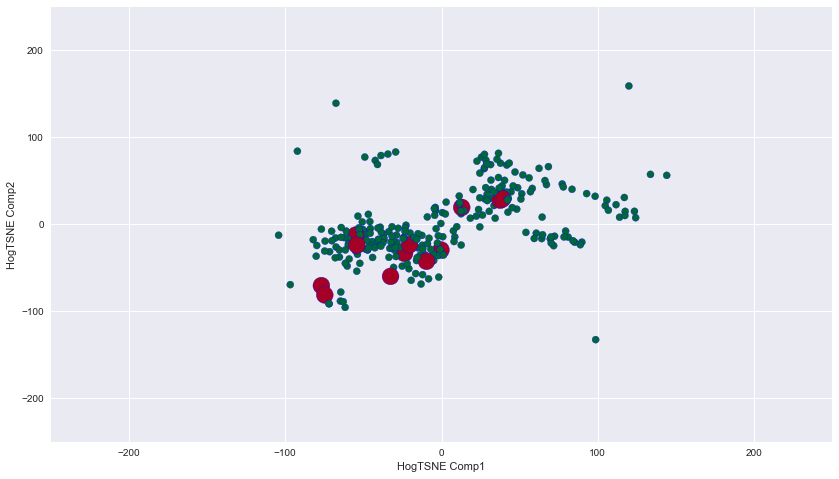

In [103]:
plt.figure()
plt.scatter(HogTSNE_df.loc[:,'Component 1'], HogTSNE_df.loc[:,'Component 2'], marker='o', c=z, cmap=plt.cm.RdYlGn, edgecolor='b', s = area)
plt.xlabel('HogTSNE Comp1')
plt.ylabel('HogTSNE Comp2')
plt.ylim(-250,250)
plt.xlim(-250,250)
plt.show()

In [104]:
#ISOMAP for dimensionality reduction
from sklearn import manifold

iso = manifold.Isomap(n_neighbors=6, n_components = 2)
iso.fit(HogTSNE_df)

HogTSNEIso_a = iso.transform(HogTSNE_df)
HogTSNEIso_df = pd.DataFrame(HogTSNEIso_a, columns=['Component 1', 'Component 2'])

In [112]:
print (HogTSNEIso_df.shape)
HogTSNEIso_df.head()

(277, 2)


,Component 1,Component 2
0,-82.467756,0.150227
1,-218.471190,-228.647978
2,-101.377820,11.645490
3,32.624272,4.150056
4,-1.321418,-15.249968


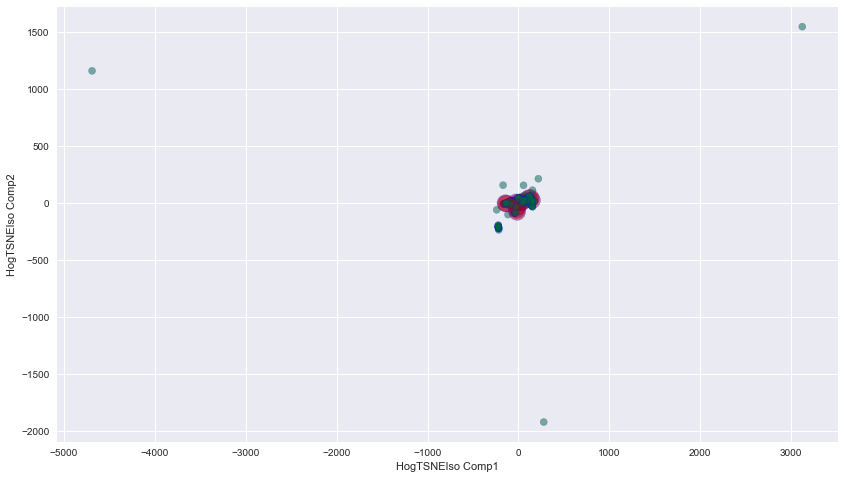

In [107]:
plt.figure()

plt.scatter(HogTSNEIso_df.loc[:,'Component 1'], HogTSNEIso_df.loc[:,'Component 2'], \
            alpha = 0.5, marker='o', c=z, cmap=plt.cm.RdYlGn, edgecolor='b', s = area)
plt.xlabel('HogTSNEIso Comp1')
plt.ylabel('HogTSNEIso Comp2')
#plt.ylim(-250,250)
#plt.xlim(-250,250)
plt.show()

##### There are several pts well outside our central group which warrant investigation.  let's zoom into our center cluster.

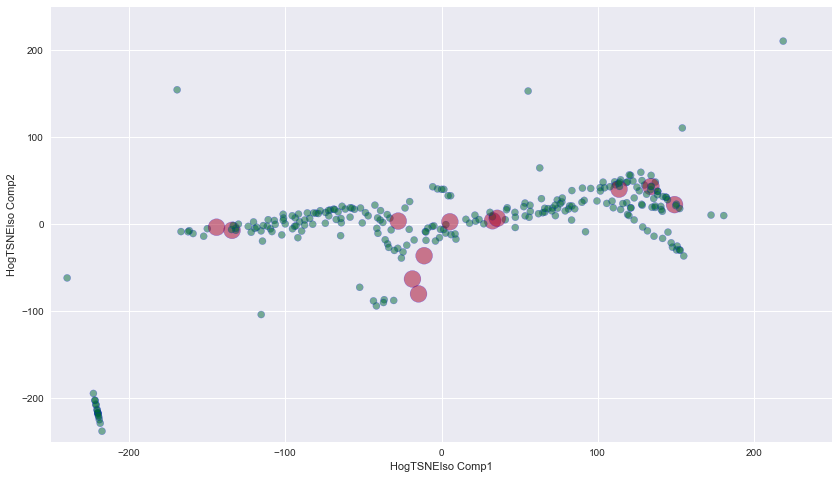

In [108]:
plt.figure()
plt.scatter(HogTSNEIso_df.loc[:,'Component 1'], HogTSNEIso_df.loc[:,'Component 2'], \
            alpha = 0.5, marker='o', c=z, cmap=plt.cm.RdYlGn, edgecolor='b', s = area)
plt.xlabel('HogTSNEIso Comp1')
plt.ylabel('HogTSNEIso Comp2')
plt.ylim(-250,250)
plt.xlim(-250,250)
plt.show()

### We can see that while we cannot clearly detect Error outliers, that we can see there are outliers to the mean center.  

In [137]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=10)
y_pred = clf.fit_predict(HogTSNEIso_df) 
y_pred

array([ 1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1

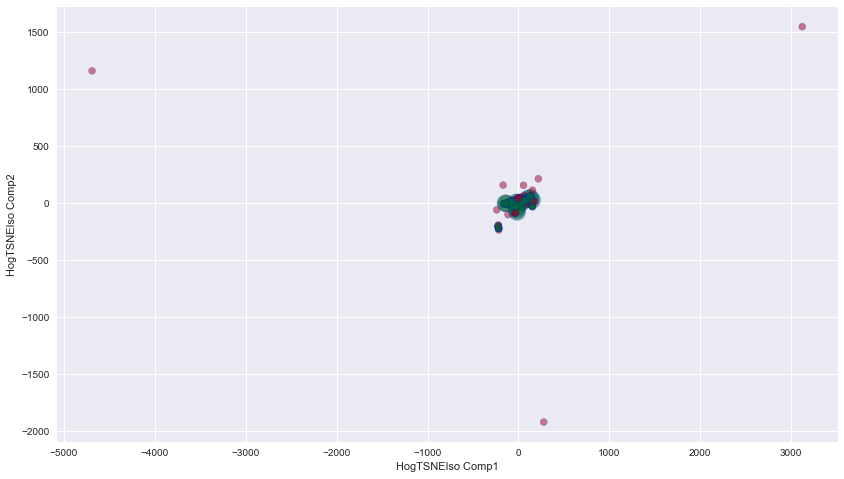

In [138]:
plt.figure()
plt.scatter(HogTSNEIso_df.loc[:,'Component 1'], HogTSNEIso_df.loc[:,'Component 2'], \
            alpha = 0.5, marker='o', c=y_pred, cmap=plt.cm.RdYlGn, edgecolor='b', s = area)
plt.xlabel('HogTSNEIso Comp1')
plt.ylabel('HogTSNEIso Comp2')
#plt.ylim(-250,250)
#plt.xlim(-250,250)
plt.show()

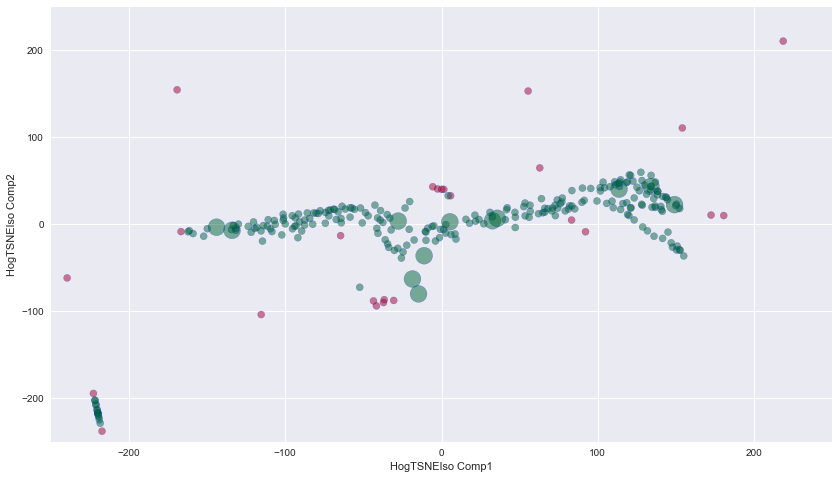

In [139]:
plt.figure()
plt.scatter(HogTSNEIso_df.loc[:,'Component 1'], HogTSNEIso_df.loc[:,'Component 2'], \
            alpha = 0.5, marker='o', c=y_pred, cmap=plt.cm.RdYlGn, edgecolor='b', s = area)
plt.xlabel('HogTSNEIso Comp1')
plt.ylabel('HogTSNEIso Comp2')
plt.ylim(-250,250)
plt.xlim(-250,250)
plt.show()

In [70]:
#ISOMAP for dimensionality reduction of HOG
from sklearn import manifold

iso = manifold.Isomap(n_neighbors=12, n_components = 4, neighbors_algorithm = 'kd_tree')
iso.fit(FV)

HogIso_a = iso.transform(FV)
HogIso_df = pd.DataFrame(HogIso_a, columns=['Component 1', 'Component 2', 'Component 3', 'Component 4'])

#ISOMAP for dimensionality reduction 
from sklearn import manifold

iso = manifold.Isomap(n_neighbors=5, n_components = 3, neighbors_algorithm = 'kd_tree')
iso.fit(X_filt)

X_filt_a = iso.transform(X_filt)
HogIso_df = pd.DataFrame(X_filt_a, columns=['Component 1', 'Component 2', 'Component 3'])#, 'Component 4'])

In [71]:
print (HogIso_df.shape)
HogIso_df.head()

(277, 4)


,Component 1,Component 2,Component 3,Component 4
0,142.020605,-45.221770,-10.850507,22.578387
1,-26.054992,9.159319,-5.193651,30.873462
2,180.489728,-61.336343,-41.821161,3.802379
3,-5.523917,51.189522,6.126352,43.625404
4,56.439708,28.243838,57.600497,1.531784


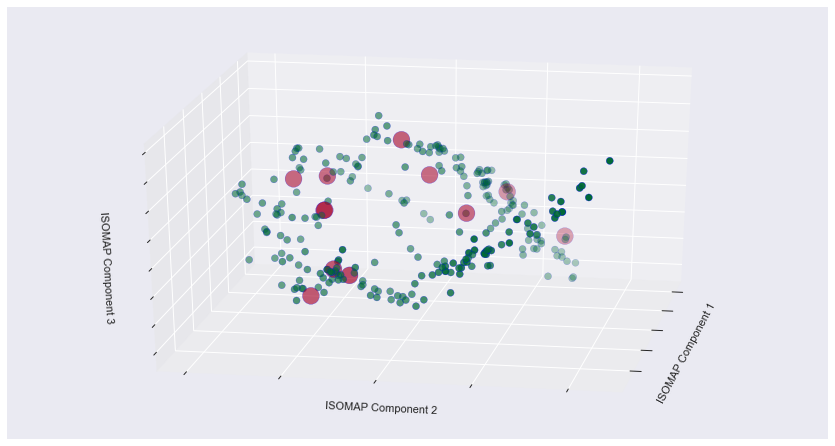

In [72]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=25, azim=190)
area = 50+75*np.pi*y_filt

#for name, label in [('normal', 0), ('Anomaly', 1)]:
#    ax.text3D(X_reduced[y == label, 0].mean(), X_reduced[y == label, 1].mean()+1.5, s = name, z = 0,
#              horizontalalignment='center', verticalalignment='center',
#              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results
z = np.choose(y_filt, [1,0])

ax.scatter(HogIso_df.loc[:,'Component 1'], HogIso_df.loc[:,'Component 2'],HogIso_df.loc[:,'Component 3'],
            c=z, cmap=plt.cm.RdYlGn, s = area, edgecolor='b')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('ISOMAP Component 1')
ax.set_ylabel('ISOMAP Component 2')
ax.set_zlabel('ISOMAP Component 3')
plt.show()

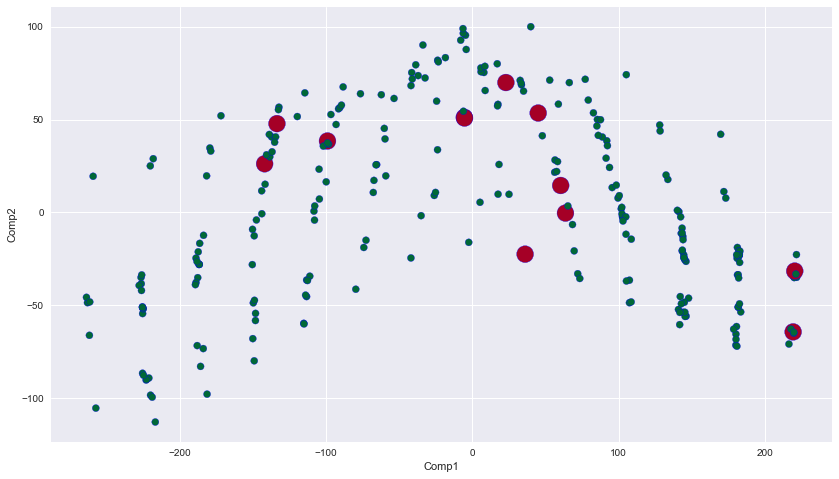

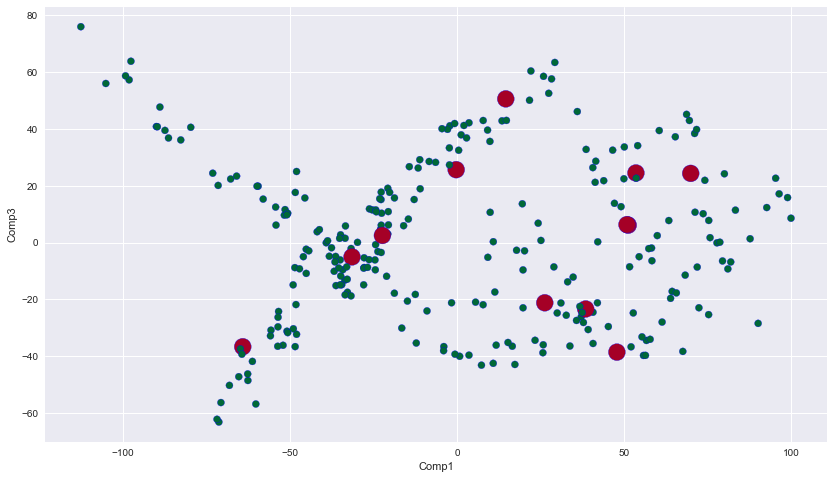

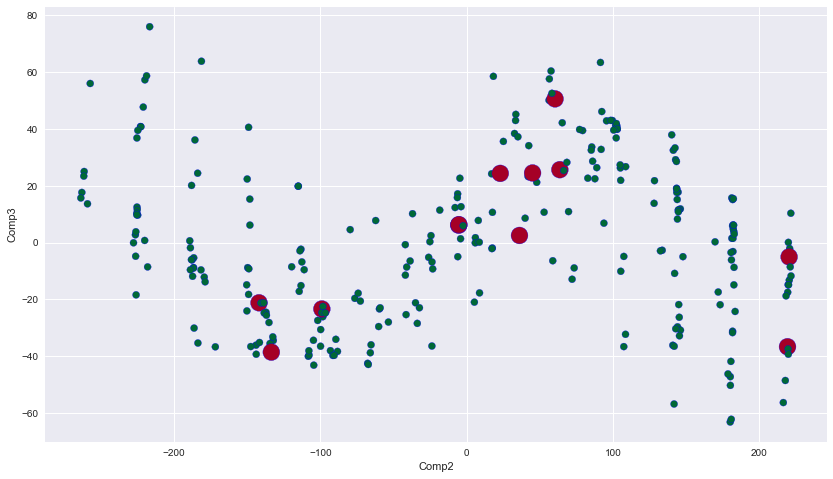

In [73]:
plt.figure()

plt.scatter(HogIso_df.loc[:,'Component 1'], HogIso_df.loc[:,'Component 2'], marker='o', c=z, cmap=plt.cm.RdYlGn, edgecolor='b', s = area)
plt.xlabel('Comp1')
plt.ylabel('Comp2')
plt.show()
plt.scatter(HogIso_df.loc[:,'Component 2'], HogIso_df.loc[:,'Component 3'], marker='o', c=z, cmap=plt.cm.RdYlGn, edgecolor='b', s = area)
plt.xlabel('Comp1')
plt.ylabel('Comp3')
plt.show()
plt.scatter(HogIso_df.loc[:,'Component 1'], HogIso_df.loc[:,'Component 3'], marker='o', c=z, cmap=plt.cm.RdYlGn, edgecolor='b', s = area)
plt.xlabel('Comp2')
plt.ylabel('Comp3')
plt.show()

# tSNE

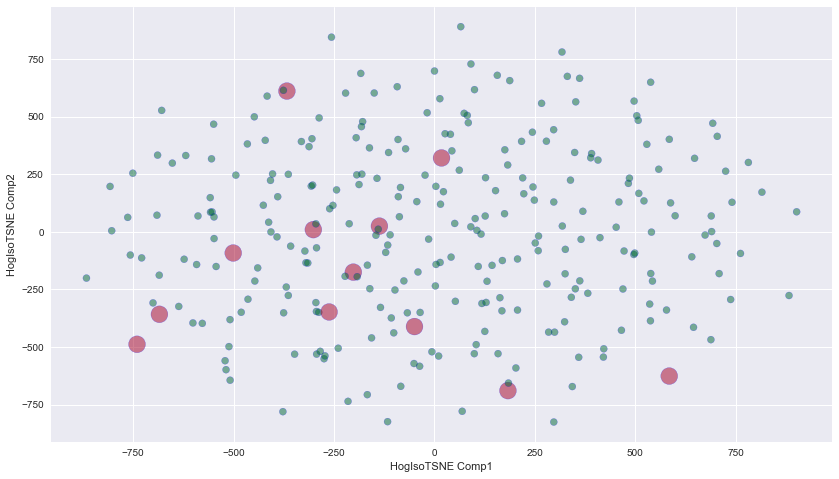

In [61]:
#tSNE
from sklearn.manifold import TSNE
HogIsoTSNE_a = TSNE(n_components=3, n_iter = 10000, perplexity = 100).fit_transform(HogIso_df)
HogIsoTSNE_a.shape
HogIsoTSNE_df = pd.DataFrame(HogIsoTSNE_a, columns=['Component 1', 'Component 2', 'Component 3'])
#HogIsoTSNE_df.head()

plt.figure()
plt.scatter(HogIsoTSNE_df.loc[:,'Component 1'], HogIsoTSNE_df.loc[:,'Component 2'], marker='o', \
            alpha = 0.5, c=z, cmap=plt.cm.RdYlGn, edgecolor='b', s = area)
plt.xlabel('HogIsoTSNE Comp1')
plt.ylabel('HogIsoTSNE Comp2')

plt.show()


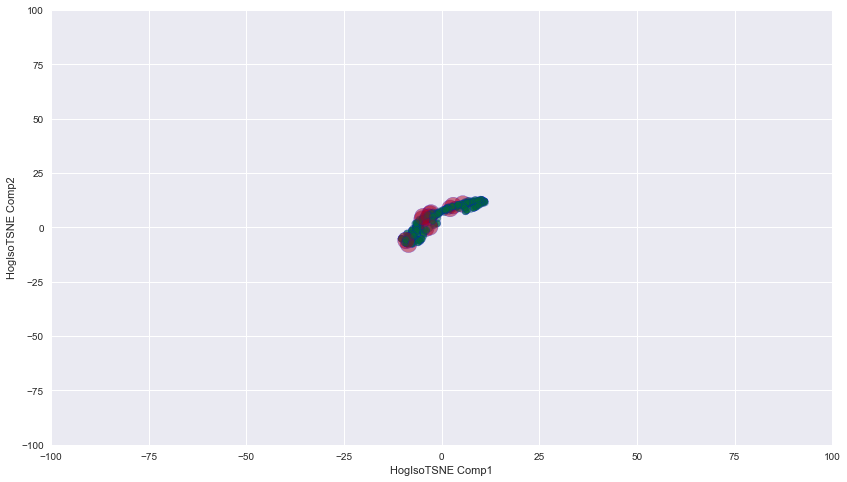

In [57]:
plt.figure()
plt.scatter(HogIsoTSNE_df.loc[:,'Component 1'], HogIsoTSNE_df.loc[:,'Component 2'], marker='o', \
            alpha = 0.5, c=z, cmap=plt.cm.RdYlGn, edgecolor='b', s = area)
plt.xlabel('HogIsoTSNE Comp1')
plt.ylabel('HogIsoTSNE Comp2')
#plt.ylim(-100,100)
#plt.xlim(-100,100)
plt.show()